# Transmisión
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para explicar los fundamentos de los <code>Sistemas de comunicaciones</code> en los cursos de telemática y redes de computadores.</p>

## Señales en comunicación.
La transmisión o Tx en comunicaciones es el proceso de envío y propagación de una señal de información analógica o digital sobre un medio de transmisión lógico o físico.

### Agenda
1. Transmisión analógica o digital.
1. Factores que afectan la transmisión.
1. Tasas de transferencia.
1. Capacidad del canal.

In [1]:
# Importar módulos al cuaderno
import math as m
import pyaudio as pa 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import struct

# Importar elementos de un módulo al cuaderno
from math import pi
from numpy import sin

## 1. [Tipos de transmisión](#agenda)

### 1.1. Transmisión analógica ✔
* [Transmisión de datos][11_1] analógicos y digitales.
* [Portadora][11_2] análoga.
* Modulada en una [banda pasante][11_3].
* [Multiplexación][11_4] por division de frecuencia.

[11_1]:https://es.wikipedia.org/wiki/Transmisi%C3%B3n_de_datos
[11_2]:https://es.wikipedia.org/wiki/Onda_portadora
[11_3]:https://es.wikipedia.org/wiki/Pasabanda
[11_4]:https://es.wikipedia.org/wiki/Multiplexaci%C3%B3n_por_divisi%C3%B3n_de_frecuencia

### 1.2. Transmisión digital ✔
* [Transmisión de datos][12_1] digitales.
* [Portadora][12_2] digital.
* Modulada en [banda base][12_3].
* [Acceso múltiple][12_4] por division de tiempo.

[12_1]:https://es.wikipedia.org/wiki/Transmisi%C3%B3n_de_datos
[12_2]:https://es.wikipedia.org/wiki/Onda_portadora
[12_3]:https://es.wikipedia.org/wiki/Banda_base
[12_4]:https://es.wikipedia.org/wiki/Acceso_m%C3%BAltiple_por_divisi%C3%B3n_de_tiempo

### 1.3. Ejemplos ✔

| <code>Transmisión analógica</code> | <code>Transmisión digital</code> | 
|--|--|
| - Video via VGA | - Video via DVI, HDMI y DisplayPort |
| - TV via NTSC o PAL | - TV via DVB, ATSC, ISDB y DTMB |
| - LAN cableadas COAXIAL | - LAN cableadas PAR TRENZADO |
| - WAN via ADSL y CATV | - LAN WAN Y MAN via Fibra óptica |
| - LAN y WAN via MEDIO INALÁMBRICO | - RS-232 y USB |

In [2]:
matplotlib.use('TkAgg')

# Caracterización de una onda (Voz)
# ---------------------------------------------------------
print_fundamental = True
print_notas_musicales = True
frecuencia_de_muestreo = 16384                          # Frecuencia de muestreo típica para audio 44100
FRAMES = 1024*2                             
num_muestras = FRAMES                                   # Tamaño del paquete a procesar
tiempo_max = num_muestras/frecuencia_de_muestreo
frecuencia_max = frecuencia_de_muestreo/2
ventana = 1/8
open_window = True

# Función para capturar datos del micrófono
# ---------------------------------------------------------
def on_close(event):
    open_window = False
    print('Closed Figure!')
    # Close stream and release PortAudio system resources
    stream.close()
    puerto_de_audio.terminate()

# Frecuencias de las notas musicales
# ---------------------------------------------------------
notas_musicales = {
    'do':(256, 261.6, 266),
    're':(288, 293.6, 298),
    'mi':(324, 329.6, 334),
    'fa':(344, 349.2, 354),
    'sol':(386, 391.9, 396),
    'la':(435, 440, 445),
    'si':(488, 493.8, 498)
}

# Abrimos un canal de audio analógico (micrófono)
# ---------------------------------------------------------
puerto_de_audio = pa.PyAudio()
stream = puerto_de_audio.open( 
    rate = frecuencia_de_muestreo,                                 
    frames_per_buffer = num_muestras,
    channels = 1,
    format = pa.paInt16,
    input = True
)

# Vectores de tiempo y frecuencia
t = np.linspace(0, tiempo_max, num_muestras)
f = np.linspace(0, frecuencia_de_muestreo, num_muestras)

# Eliminando frecuencias espejo
# ---------------------------------------------------------
F = (frecuencia_de_muestreo/FRAMES) * np.arange(0, FRAMES//2)   # Para encontrar la frecuencia fundamental

# Transformando loa valores a escalas apreciables
# ----------------------------------------------------
t *= 1_000      # Transformando escala de t a ms

# Gráfica
# ----------------------------------------------------
# Representación de la señal del micrófono
# Dos gráficas - Dominio del tiempo y dominio de la frecuencia
fig = plt.figure(layout="constrained", facecolor='0.8', figsize=(12, 4))
plt.rcParams['axes.facecolor']='black'
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Señales en el dominio del tiempo y dominio de la frecuencia
# ---------------------------------------------------------
y, = ax1.plot(t, np.random.rand(FRAMES),'r')
p, = ax2.plot(f, np.random.rand(FRAMES), 'b') #semilogx

if print_notas_musicales:
    for item in notas_musicales:
        ax2.plot(notas_musicales[item], [4000, 4400, 4000])

# Limites
ax1.set_ylim(-33e3, 33e3)
ax2.set_ylim(1, 8000)
ax1.set_xlim(0, tiempo_max*1000)
ax2.set_xlim(1, frecuencia_max*ventana)

# Textos en la gráfica
fig.canvas.manager.set_window_title('Análisis del micrófono')
plt.suptitle("Señal de audio analógica".upper(), fontsize=12, fontweight="bold")
ax1.set_title("Dominio del tiempo ".upper() + "[ms]", loc="left", fontsize=10, fontweight="bold")
ax2.set_title("Dominio de frecuencia ".upper() + "[Hz]", loc="left", fontsize=10, fontweight="bold")

ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

fig.canvas.mpl_connect('close_event', on_close)

fig.show()

suma = np.zeros(FRAMES//2)
iteraciones = 0
while open_window:
    try:
        df_bytes = stream.read(FRAMES)                          # Leemos data frames en bytes
        y_values = struct.unpack(str(FRAMES) + 'h', df_bytes)   # Convertimos los datos que se encuentran empaquetados en bytes 
        p_values = abs(np.fft.fft(y_values)/FRAMES)             # Calculamos la FFT y la Magnitud de la FFT del paquete de datos
        suma += p_values[0:FRAMES//2]
        iteraciones += 1
        y.set_ydata(y_values)                                   # Asignamos los datos a la curva de la variación temporal
        p.set_ydata(p_values)                                   # Asignamos la Magnitud de la FFT a la curva del espectro
        fig.canvas.draw_idle()
        fig.canvas.flush_events()
        if print_fundamental:
            p_values = p_values[0:FRAMES//2]                        # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
            fundamental = F[np.where(p_values == np.max(p_values))] # Encontramos la frecuencia que corresponde con el máximo de M_gk                                                              
            ax2.text(                                               # Imprimimos el valor de la frecuencia dominante  
                frecuencia_max*ventana/2, 6000,
                f"Frecuencia dominante: {int(fundamental)}", backgroundcolor='1', color="#f00")
    except:
        break


Closed Figure!


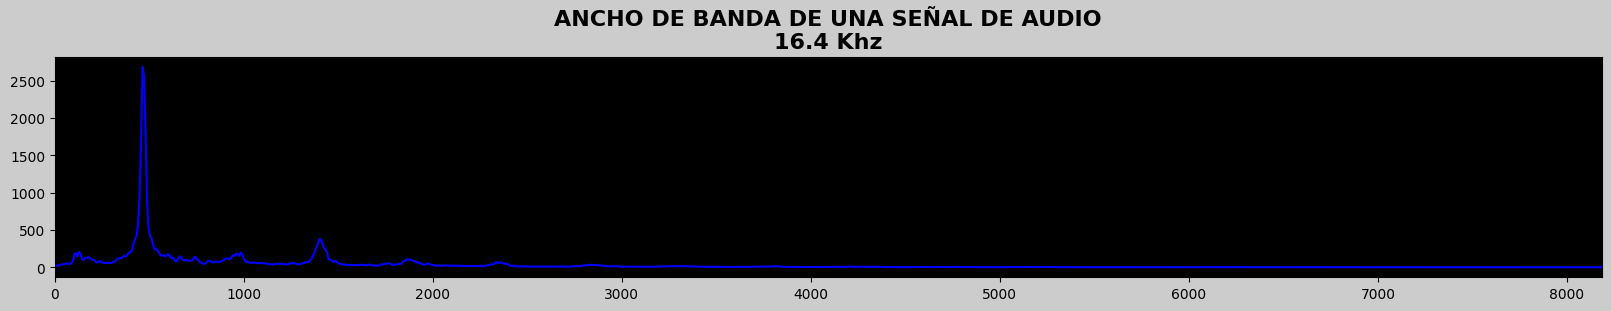

In [3]:
%matplotlib inline
promedio = suma/iteraciones

# Gráfica
# ----------------------------------------------------
fig = plt.figure(layout="constrained", facecolor='0.8', figsize=(16, 3))
plt.plot(F, promedio, 'b')

# Limites y garrapatas
plt.xlim(F.min(), F.max())
plt.xticks(np.arange(F.min(), F.max(), step=1000))

# Textos en la gráfica
plt.title(
    "Ancho de banda de una señal de Audio\n".upper() +
    f"{frecuencia_de_muestreo/1_000:.1f} Khz", fontsize=16, fontweight="bold")

plt.show()

## 2. [Factores que afectan la transmisión](#agenda)

### 2.1. La atenuación ✔
la [Atenuación][alpha] es perdida de potencia de la señal durante su propagación por el medio, depende de las características del medio y de la frecuencia.


[alpha]:https://es.wikipedia.org/wiki/Atenuación

#### 2.1.1. Causas:
* Absorción del material.
* Oposición Transmisión.
* Defectos de fabricación.
* Deformación del material.

#### 2.1.2. Representación:

![Representación](../img/attenuation_utp.svg "Atenuación")

#### 2.1.3. Ecuaciones:
$$
\begin{aligned}
\alpha  &= 10 \cdot log_{10}\left(\frac{P_o}{P_i}\right) \\ 
        &= 20 \cdot log_{10}\left(\frac{V_o}{V_i}\right) \\
\end{aligned}
$$

In [4]:
def voltage_attenuation(voltage_out:float, voltage_in:float):
    ''' Calcula la atenuación en un medio de txx desde los valores de voltaje de la señal de entrada. '''
    return round(20 * m.log10(voltage_out/voltage_in))

def voltage_out(decibels:float, voltage_in:float=100):
    ''' Calcula el voltaje de salida desde los valores de atenuación de la señal de entrada. '''
    return round(voltage_in * (10 ** (decibels/20)), 2)

def power_attenuation(power_out:float, power_in:float):
    ''' Calcula la atenuación desde los valores de potencia de la señal de entrada. '''
    return round(10 * m.log10(power_out/power_in))

def power_out(decibels:float, power_in:float=100):
    ''' Calcula la potencia de salida desde los valores de atenuación de la señal de entrada. '''
    return round(power_in * (10 ** (decibels/10)), 2)


voltaje_entrada = 100

# Salida estándar - Formateo de cadenas
# ----------------------------------------------------
lines = 34
print(lines*"-")
print(f"Voltaje de entrada:     {voltaje_entrada:10.0f} voltios")
print(f"Atenuación de voltaje:  {voltage_attenuation(70.7, voltaje_entrada):10.0f} dB")
print(f"Voltaje de salida:      {voltage_out(-3, voltaje_entrada):10.0f} voltios")
print(lines*"-")
print(f"Voltaje de entrada:     {voltaje_entrada:10.0f} voltios")
print(f"Atenuación de voltaje:  {voltage_attenuation(50, voltaje_entrada):10.0f} dB")
print(f"Voltaje de salida:      {voltage_out(-6, voltaje_entrada):10.0f} voltios")
print(lines*"-")

----------------------------------
Voltaje de entrada:            100 voltios
Atenuación de voltaje:          -3 dB
Voltaje de salida:              71 voltios
----------------------------------
Voltaje de entrada:            100 voltios
Atenuación de voltaje:          -6 dB
Voltaje de salida:              50 voltios
----------------------------------


### 2.2. El ruido ✔
El [Ruido][noise] son las potencias parásitas que afectan la transmisión.

[noise]:https://es.wikipedia.org/wiki/Ruido_(comunicación)#

#### 2.2.1. relación señal a ruido
La [SNR][221] o relación señal/ruido o  se define como la proporción existente entre la potencia de la señal que se transmite y la potencia del ruido que la corrompe.

[221]:https://en.wikipedia.org/wiki/Signal-to-noise_ratio

$$
\begin{aligned}
SNR = \frac{P_s}{P_n}  &= \left(\frac{V_s}{V_n}\right)^{2} \\ 
     &= 10 \cdot log_{10}\left(\frac{P_s}{P_n}\right) = 20 \cdot log_{10}\left(\frac{V_s}{V_n}\right) \\
\end{aligned}
$$


In [5]:
def snr(señal:float, ruido:float, potencia:bool=True, dB:bool=True)->float:
    ''' Calcula la atenuación desde los valores de voltaje o potencia de la señal de entrada. '''
    ratio = señal/ruido
    lineal = ratio if potencia else ratio**2
    snr = round(10 * m.log10(lineal)) if dB else lineal
    return snr

voltaje_señal = 5
voltaje_ruido = 0.28
resistencia = 50 
potencia_señal = (voltaje_señal**2)/resistencia
potencia_ruido = (voltaje_ruido**2)/resistencia

# Salida estándar - Formateo de cadenas
# ----------------------------------------------------
lines = 28
print(lines*"-")
print(f" Relación señal a ruido")
print(lines*"-")
print(f" SNR voltaje:   {snr(voltaje_señal, voltaje_ruido, potencia=False, dB=False):11,.1f}")
print(f" SNR potencia:  {snr(potencia_señal, potencia_ruido, dB=False):11,.1f}")
print(f" SNR en dB:     {snr(potencia_señal, potencia_ruido):11,.2f}  dB")
print(lines*"-")

----------------------------
 Relación señal a ruido
----------------------------
 SNR voltaje:         318.9
 SNR potencia:        318.9
 SNR en dB:           25.00  dB
----------------------------


### 2.3. El eco ✔
El [Eco][23] es reflexión de una parte de la potencia original.

[23]:https://es.wikipedia.org/wiki/P%C3%A9rdida_de_retorno

#### 2.3.1. Paradiafonia
La diafonía [NEXT][231] o de extremo cercano, denominada en inglés Near end crosstalk es la perturbación de un circuito a la señal de un circuito adyacente, medida en el extremo mas cercano a la fuente y la PSNEXT es una medida NEXT que incluye la suma algebraica de todas las contribuciones de diafonía de los pares adyacentes.

[231]:https://es.wikipedia.org/wiki/Diafon%C3%ADa#Paradiafon%C3%ADa

![Representación](../img/next.svg "Paradiafonia")

$$ \alpha_p = 20 \cdot log_{10}\left(\frac{V_{E}}{V_{I}}\right) $$


#### 2.3.2. Telediafonía
La diafonía [FEXT][232] o de extremo lejano, denominada en inglés Far end crosstalk es la perturbación de un circuito a la señal de un circuito adyacente, medida en el extremo mas lejano a la fuente y la PSFEXT es una medida FEXT que incluye la suma algebraica de todas las contribuciones de diafonía de los pares adyacentes

[232]:https://es.wikipedia.org/wiki/Diafon%C3%ADa#Telediafon%C3%ADa

![Representación](../img/fext.svg "Telediafonia")

$$ \alpha_t = 20 \cdot log_{10}\left(\frac{V_{E}}{V_{I}}\right) $$

>Nota: La AXT o Alien crosstalk es una interferencia provocada por otros cables colocados cerca del cable de interés, en contraposición a las señales contenidas en el mismo cable.


## 3. [Tasas de transferencia](#agenda)
Es posible medir el rendimiento un canal de comunicaciones utilizando distintas definiciones; esto es porque la carga útil de mensajes (información) que la red es capaz de transportar por unidad de tiempo depende de la sobrecarga de los distintos protocolos en el modelo de comunicaciones, de las características del medio de transmisión y porque en algunos casos es necesario construir diferentes niveles de redundancia para garantizar una transmisión segura y libre de errores, lo que implica aumentar la sobrecarga de uno o varios protocolos encargados de la codificación y adaptación de la señal al medio.

### 3.1. Tasa de transferencia efectiva ✔
La [tasa de transferencia efectiva][31] o throughput es el volumen de trabajo o de información neto que fluye a través de un sistema o red de computadoras; en esta medida se incluye toda la sobrecarga necesaria en los protocolos necesarios para una transmisión segura y libre de errores.

[31]:https://es.wikipedia.org/wiki/Tasa_de_transferencia_efectiva

#### 3.1.1. Medidas relacionadas
* [Goodput][311_1]: es el rendimiento a nivel de aplicación de una comunicación, excluyendo la sobrecarga del protocolo.
* [Capacidad del canal][311_2]: es la medida de los recursos de comunicación teóricos aprovechables de una red telemática.
* [Ancho de Banda][311_3]: determina el rango de frecuencias aprovechables para la comunicación de un canal de comunicaciones.

[311_1]:https://en.wikipedia.org/wiki/Goodput
[311_2]:https://es.wikipedia.org/wiki/Capacidad_del_canal
[311_3]:https://es.wikipedia.org/wiki/Ancho_de_banda

#### 3.1.2. Comparación

__Goodput__ ([Carga util en bps][311_1]) <code>≤</code> __Throughput__ ([Velocidad real en bps][31]) <code>≤</code> __Channel capacity__ ([Capacidad teórica en bps][311_2])

![Representación](../img/channel.svg "Canal de comunicaciones")


#### 3.1.3. Ejemplo: <code>TCP</code> , <code>FTP</code> , <code>HTTP</code> 
Para probar un canal de comunicaciones de 50 MB/s se necesitan un archivo de prueba de al menos 100 MB, que saturara el canal por al menos un segundo:

__Consideraciones:__
* [TCP:][tcp] El tamaño de un paquete TCP esta limitado a 1500 bytes.
* [FTP:][ftp] La velocidad neta disponible para el usuario en una aplicación FTP, suele ser entre un 10% y un 15% menor a la velocidad real, debido al ancho de banda consumido por las cabeceras y las colas de los distintos protocolos usados en una transmisión libre de errores.
* [HTTP:][http]
    * __1.0:__ Durante la carga de una página web de internet en el navegador, la descarga de cada elemento desde el servidor necesita la apertura y la clausura de una conexión TCP.
    * __1.1:__ El cliente y servidor pueden intercambiar mensajes sobre la misma conexión TCP.

[tcp]:https://es.wikipedia.org/wiki/Protocolo_de_control_de_transmisi%C3%B3n
[ftp]:https://es.wikipedia.org/wiki/Protocolo_de_transferencia_de_archivos
[http]:https://es.wikipedia.org/wiki/Protocolo_de_transferencia_de_hipertexto

In [6]:
# tcp/ip
# ---------------------------------------------------------
bytes_tcp_max = 1500
encabezado_tcp = 20
encabezado_ip = 20
marca_de_tiempo = 12
carga_util_tcp = bytes_tcp_max - (encabezado_tcp + encabezado_ip + marca_de_tiempo)
eficiencia_tcp = 100*carga_util_tcp/bytes_tcp_max
# Ethernet
carga_util_eth = bytes_tcp_max
encabezado_trama = 26
brecha_entre_tramas = 96
bytes_eth_max = (encabezado_trama + brecha_entre_tramas) + bytes_tcp_max
eficiencia_eth = 100*carga_util_eth/bytes_eth_max
# Eficiencia total
eficiencia = eficiencia_eth*eficiencia_tcp/100

# Salida estándar - Formateo de cadenas
# ---------------------------------------------------------
lines = 38
print(" " + lines*"-")
print(f"|{'Eficiencia de Ethernet(tcp/ip)'.center(lines)}|")
print(" " + lines*"-")
print(f"| Protocolo | Tamaño (bits) | Carga util (bits) |  Eficiencia (%) |")
print(" " + lines*"-")
print(f"| TCP/IP    |{bytes_tcp_max:14,.0f} |{carga_util_tcp:18,.0f} |{eficiencia_tcp:14,.1f} % |")
print(f"| Ethernet  |{bytes_eth_max:14,.0f} |{carga_util_eth:18,.0f} |{eficiencia_eth:14,.1f} % |")
print(" " + lines*"-")
print(f"| Total     |{bytes_eth_max:14,.0f} |{carga_util_tcp:18,.0f} |{eficiencia:14,.1f} % |")
print(" " + lines*"-")


 --------------------------------------
|    Eficiencia de Ethernet(tcp/ip)    |
 --------------------------------------
| Protocolo | Tamaño (bits) | Carga util (bits) |  Eficiencia (%) |
 --------------------------------------
| TCP/IP    |         1,500 |             1,448 |          96.5 % |
| Ethernet  |         1,622 |             1,500 |          92.5 % |
 --------------------------------------
| Total     |         1,622 |             1,448 |          89.3 % |
 --------------------------------------


In [40]:
# FTP
# ---------------------------------------------------------
''' La velocidad neta disponible para el usuario en una aplicación FTP, 
suele ser entre un 10% y un 15% menor a la velocidad real, 
debido al ancho de banda consumido por las cabeceras y las colas 
de los distintos protocolos usados en una transmisión libre de errores.'''
tamaño_del_archivo = 100_000_000    # Archivo de prueba.
tamaño_de_la_ventana = 4096         # Especifica el tamaño del búfer de transferencia.
colisiones = 5                      # Porcentaje de segmentos retransmitidos (1-5).
retardo_esperado = 50               # LAN:30µs, FO:10ms, CATV:20ms, ADSL:50ms, Satélite:900ms.
tiempo_ms = 2_471

# ftp
tiempo_comandos_ftp = 3*retardo_esperado
ventanas = m.ceil(tamaño_del_archivo/tamaño_de_la_ventana)
paquetes_por_ventana = m.ceil(tamaño_de_la_ventana/carga_util_tcp)
total_paquetes_tcp = (1+colisiones/100) * paquetes_por_ventana * ventanas

# Tasas de transferencia
tiempo = (tiempo_ms-tiempo_comandos_ftp)/1_000
throughput = (total_paquetes_tcp * bytes_tcp_max) / tiempo
goodput = tamaño_del_archivo / tiempo
sobrecarga = -100*(1-throughput/goodput)

# Salida estándar - Formateo de cadenas
# ---------------------------------------------------------
lines = 35
print(lines*"-")
print(f"Tiempo transferencia:   {tiempo*1e3:11,.0f} ms")
print(f"Carga total:            {tamaño_del_archivo/1e6:11,.0f} Mbps")
print(f"Throughput:             {throughput/1e6:11,.0f} Mbps")
print(f"Goodput:                {goodput/1e6:11,.0f} Mbps")
print(f"Sobrecarga:             {sobrecarga:11,.1f} %")
print(lines*"-")

-----------------------------------
Tiempo transferencia:         2,321 ms
Carga total:                    100 Mbps
Throughput:                      50 Mbps
Goodput:                         43 Mbps
Sobrecarga:                    15.4 %
-----------------------------------


### 3.2. Tasa de transferencia de símbolos (Rs) ✔
En un sistema de comunicaciones la [tasa de transferencia de símbolos][32] o Rs es el número de unidades de señal por unidad de tiempo que pueden ser transmitidos desde un emisor hacia el receptor a traves de un canal de comunicaciones.

[32]:https://es.wikipedia.org/wiki/Tasa_de_baudios

#### 3.2.1 Consideraciones
* También llamado [baudrate][321_1].
* Define el [número de símbolos][321_2] que se transmiten por unidad de tiempo.
* Dependiendo de la [codificación de linea][321_3] un símbolo puede representar muchos bits.
* Esta limitado por el [ancho de banda][321_4].
* Se mide en [Baudio][321_5] (b/s).

[321_1]:https://es.wikipedia.org/wiki/Tasa_de_baudios
[321_2]:https://es.wikipedia.org/wiki/Diagrama_de_constelaci%C3%B3n
[321_3]:https://es.wikipedia.org/wiki/C%C3%B3digos_en_l%C3%ADnea
[321_4]:https://es.wikipedia.org/wiki/Ancho_de_banda_(inform%C3%A1tica)/
[321_5]:https://es.wikipedia.org/wiki/Baudio


#### 3.2.2. Tasa de transferencia binaria (Rb)
* También llamado [bitrate][322_1].
* Define el [número de bits][322_2] que se transmiten por unidad de tiempo.
* Depende de la [codificación del canal][322_3] .
* Debe ser menor a la [capacidad del canal][322_4].
* Se mide en [bits por segundo][322_5] (b/s). 

[322_1]:https://es.wikipedia.org/wiki/Tasa_de_bits
[322_2]:https://es.wikipedia.org/wiki/Bit
[322_3]:https://es.wikipedia.org/wiki/C%C3%B3digo_de_canal
[322_4]:https://es.wikipedia.org/wiki/Capacidad_del_canal
[322_5]:https://es.wikipedia.org/wiki/Bits_por_segundo

#### 3.2.3. Codificación de linea
* Su propósito es asociar una [secuencia de bits][323_1] a cada símbolo.
* Un cambio de estado en la [señal digital][323_2] es un símbolo.
* Se usa [modulación][323_3] en banda base de forma eficiente.
* Se busca que el nivel de [corriente continua][323_4] cercano a cero.
* Se busca que el [ancho de banda][323_5] sea mínimo.

[323_1]:https://es.wikipedia.org/wiki/Byte
[323_2]:https://es.wikipedia.org/wiki/Se%C3%B1al_digital
[323_3]:https://es.wikipedia.org/wiki/Modulaci%C3%B3n_(telecomunicaci%C3%B3n)/#
[323_4]:https://es.wikipedia.org/wiki/Corriente_continua
[323_5]:https://es.wikipedia.org/wiki/Ancho_de_banda

#### 3.2.4. Codificación del canal
* Su propósito introducir [redundancia][324_1] por grupo de símbolos.
* Se usa [códigos bloque][324_2].
* Se usa [códigos rejilla][324_3].
* Se busca detectar [errores][324_4].
* Algunos buscan [corregir hacia adelante][324_5].

[324_1]:https://es.wikipedia.org/wiki/Redundancia_(teor%C3%ADa_de_la_información)/#
[324_2]:https://es.wikipedia.org/wiki/Verificaci%C3%B3n_de_redundancia_c%C3%ADclica
[324_3]:https://es.wikipedia.org/wiki/C%C3%B3digo_convolucional
[324_4]:https://es.wikipedia.org/wiki/Detecci%C3%B3n_y_correcci%C3%B3n_de_errores
[324_5]:https://es.wikipedia.org/wiki/Correcci%C3%B3n_de_errores_hacia_adelante

In [7]:
# Gigabit Ethernet 1000Base-T
# ---------------------------------------------------------
# Transmisión en banda base (Digital)
# Line code TCM 4D-PAM-5
# Categoría minima UTP 5e

carriles = 4
cambios_señal = 5       # Símbolos (niveles)
ancho_de_banda = 62.5


rendimiento_por_carril = 4
throughput = rendimiento_por_carril * carriles * ancho_de_banda
throughput

1000.0

## 4. [Capacidad del canal](#agenda)
El [Ruido][noise] son las potencias parásitas que afectan la transmisión.

[noise]:https://es.wikipedia.org/wiki/Ruido_(comunicación)#

### 4.1. Consideraciones ✔
* Maxima [información][41_1] que un canal puede transmitir de forma fiable.
* Fiable significa que la [probabilidad de error][41_2] es despreciable. 
* Está limitada por su [relación señal a ruido][41_3] (SNR) y el ancho de banda.
* Se calcula empleando el [teorema de Shannon-Hartley][41_4].
* Se mide en [bits por segundo][41_5] (b/s). 

[41_1]:https://es.wikipedia.org/wiki/Informaci%C3%B3n
[41_2]:https://es.wikipedia.org/wiki/Teorema_de_Shannon-Hartley
[41_3]:https://es.wikipedia.org/wiki/Relaci%C3%B3n_se%C3%B1al/ruido
[41_4]:https://es.wikipedia.org/wiki/Teorema_de_Shannon-Hartley
[41_5]:https://es.wikipedia.org/wiki/Bits_por_segundo

### 4.2. Ecuaciones de Shannon - Hartley ✔

$$
\begin{aligned}
C = B \cdot log_{2}\left(1+SNR\right) &= B \cdot log_{2}\left(1+ \frac{P_S}{P_N}\right) \\
&= B \cdot log_{2}\left(1+ \frac{E_b \cdot R_b}{N_o \cdot B}\right) \\ 
\end{aligned}
$$

### 4.3. Representación ✔

![Representación](../img/channel_capacity.svg "Ca")

In [ ]:
Vc = 299_792_458        # Velocidad de la luz [m.s]
Kp = 6.79e-34           # Constante de Plank [J.s]

# Diccionario de frecuencias de la luz en Thz
frecuencias = {"Infrarrojo":337, "Rojo":470, "Amarillo":496, "Verde":581, "Azul": 641, "Violeta":744}

print(f"------------------------------------------------------------------------")
print(f"|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |")
print(f"------------------------------------------------------------------------")
for key in frecuencias:
    color = key
    f = frecuencias[key] * 1e12
    λ = Vc / f
    e = Kp * f
    p = 3600 * e
    print(f"|       {color:>10} | {f:10.2e} |  {λ:11.2e}  |  {e:7.2e} | {p:7.2e} |")

print(f"------------------------------------------------------------------------")

------------------------------------------------------------------------
|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |
------------------------------------------------------------------------
|       Infrarrojo |   3.37e+14 |     8.90e-07  |  2.29e-19 | 8.24e-16 |
|             Rojo |   4.70e+14 |     6.38e-07  |  3.19e-19 | 1.15e-15 |
|         Amarillo |   4.96e+14 |     6.04e-07  |  3.37e-19 | 1.21e-15 |
|            Verde |   5.81e+14 |     5.16e-07  |  3.94e-19 | 1.42e-15 |
|             Azul |   6.41e+14 |     4.68e-07  |  4.35e-19 | 1.57e-15 |
|          Violeta |   7.44e+14 |     4.03e-07  |  5.05e-19 | 1.82e-15 |
------------------------------------------------------------------------


---
## Mas Recursos
- [Ancho de banda](https://es.wikipedia.org/wiki/Ancho_de_banda) (Wikipedia)
- [Producto: retardo * ancho de banda](https://en.wikipedia.org/wiki/Bandwidth-delay_product) (Wikipedia)
- [Ethernet](https://es.wikipedia.org/wiki/Ethernet) (Wikipedia)
- [HTTP](https://es.wikipedia.org/wiki/Protocolo_de_transferencia_de_hipertexto) (Wikipedia)
